In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [2]:
newdata=pd.read_csv('Real Life.csv')

In [3]:
newdata.head(5)

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [4]:
data=newdata.drop(['Model'],axis=1)

In [5]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [6]:
 data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv=data.dropna(axis=0)

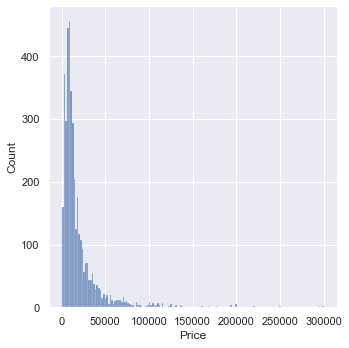

In [8]:
sns.displot(data_no_mv['Price'])

# Dealing with Outliers

In [9]:
q=data_no_mv['Price'].quantile(0.99)
data_no_mv=data_no_mv[data_no_mv['Price']<q]
data_no_mv.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


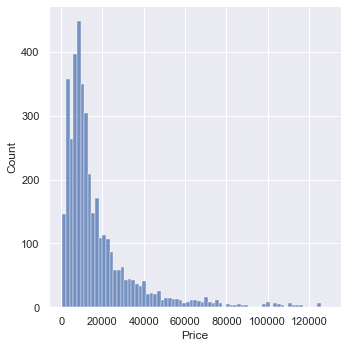

In [10]:
sns.displot(data_no_mv['Price'])

In [11]:
q=data_no_mv['Mileage'].quantile(0.99)
data_no_mv=data_no_mv[data_no_mv['Mileage']<q]
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


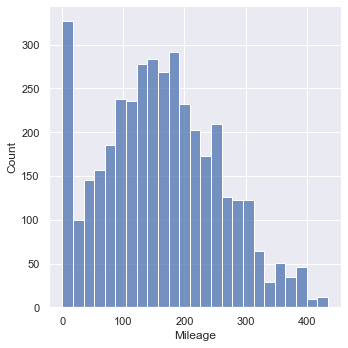

In [12]:
sns.displot(data_no_mv['Mileage'])

In [13]:
data_no_mv=data_no_mv[data_no_mv['EngineV']<6.5]

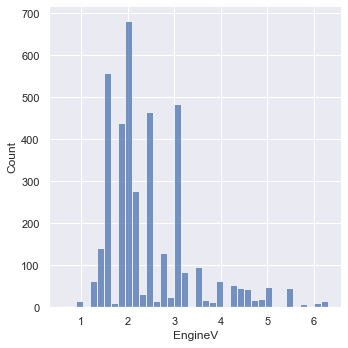

In [14]:
sns.displot(data_no_mv['EngineV'])

In [15]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3921,3921.000000,3921,3921.000000,3921.000000,3921,3921,3921.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1499,NaN,NaN,1818,3559,NaN
mean,NaN,17988.421311,NaN,161.279776,2.443497,NaN,NaN,2006.406019
std,NaN,19041.658686,NaN,96.068269,0.946198,NaN,NaN,6.595871
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [16]:
q=data_no_mv['Year'].quantile(0.01)
data_no_mv=data_no_mv[data_no_mv['Year']>q]
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


In [17]:
data_cleaned=data_no_mv.reset_index(drop='True')

In [18]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


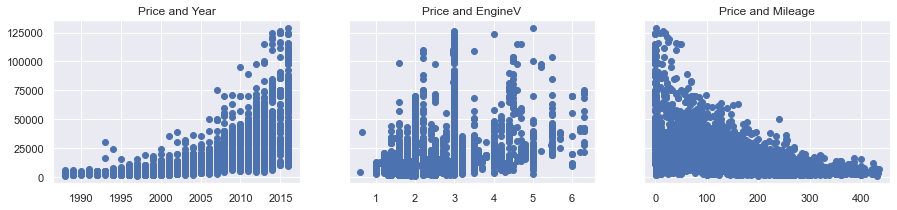

In [19]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

In [20]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['logPrice']=log_price

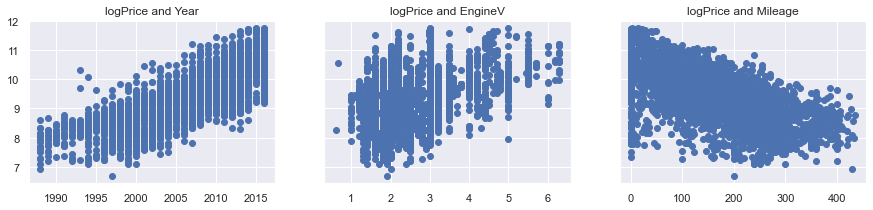

In [21]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['logPrice'])
ax1.set_title('logPrice and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['logPrice'])
ax2.set_title('logPrice and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['logPrice'])
ax3.set_title('logPrice and Mileage')
plt.show()

In [22]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features']=variables.columns

In [24]:
vif

,vif,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [25]:
data_cleaned=data_cleaned.drop(['Year'],axis=1)

In [27]:
variables.shape

(3867, 3)

In [28]:
data_no_dummies=pd.get_dummies(data_cleaned,drop_first=True)

In [29]:
data_no_dummies.head()

,Mileage,EngineV,logPrice,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [30]:
data_no_dummies.columns.values

array(['Mileage', 'EngineV', 'logPrice', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols=['logPrice','Mileage', 'EngineV',  'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed=data_no_dummies[cols]

In [33]:
data_preprocessed.head()

,logPrice,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# REGRESSIOn

In [37]:
target=data_preprocessed['logPrice']
inputs=data_preprocessed.drop(['logPrice'],axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [50]:
inputs_scaled=scaler.transform(inputs)


## Train and Test data

In [52]:
from sklearn.model_selection import train_test_split

In [75]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=.2,random_state=42)


In [76]:
reg=LinearRegression()

In [77]:
reg.fit(x_train,y_train)

LinearRegression()

In [78]:
yhat=reg.predict(x_train)

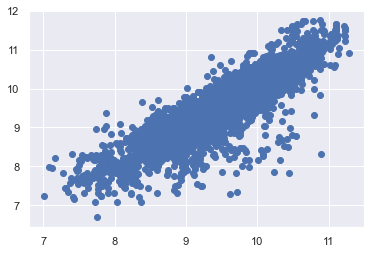

In [79]:
plt.scatter(yhat,y_train)
plt.show()

Text(0.5, 1.0, 'Residual plot')

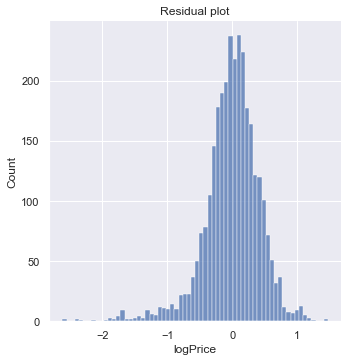

In [80]:
sns.displot(y_train-yhat)
plt.title("Residual plot")

In [81]:
reg.score(x_train,y_train)

0.7546487921881218

In [82]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.468156
1,EngineV,0.215268
2,Brand_BMW,0.011052
3,Brand_Mercedes-Benz,0.005692
4,Brand_Mitsubishi,-0.142472
5,Brand_Renault,-0.187693
6,Brand_Toyota,-0.065297
7,Brand_Volkswagen,-0.098989
8,Body_hatch,-0.139808
9,Body_other,-0.093845


## Testing

In [85]:
yhat_test=reg.predict(x_test)


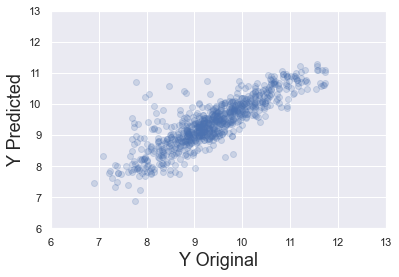

In [88]:
plt.scatter(y_test,yhat_test,alpha=0.2)
plt.xlabel('Y Original',size=18)
plt.ylabel('Y Predicted',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual plot')

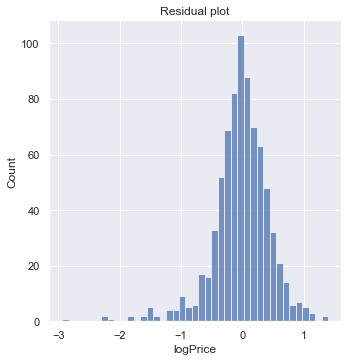

In [87]:
sns.displot(y_test-yhat_test)
plt.title("Residual plot")

In [92]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['predicted'])
y_test=y_test.reset_index(drop=True)
df_pf['Target']=np.exp(y_test)

In [93]:
df_pf.head()

,predicted,Target
0,40419.308971,21300.0
1,7956.895960,8900.0
2,5757.284408,3250.0
3,9765.810605,12000.0
4,7027.363814,5400.0


In [95]:
df_pf['Residual']=df_pf['predicted']-df_pf['Target']

In [96]:
df_pf.head()

,predicted,Target,Residual
0,40419.308971,21300.0,19119.308971
1,7956.895960,8900.0,-943.104040
2,5757.284408,3250.0,2507.284408
3,9765.810605,12000.0,-2234.189395
4,7027.363814,5400.0,1627.363814
